In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image


In [12]:
# 1. Data Loading and Preprocessing
data_dir = r"C:\Users\Desktop\Facial-Emotions-Detection\face-expression-recognition-dataset\images"
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')

In [18]:
# Image Data Generator with enhanced augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=64,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [19]:
# 2. Model Building
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2, 2, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,952,519 (7.45 MB)

 Trainable params: 1,949,063 (7.44 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [20]:
# 3. Model Training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7, verbose=1)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

history = model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[early_stopping, lr_scheduler, checkpoint]
)

Epoch 1/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.1618 - loss: 2.9478 

451/451 ━━━━━━━━━━━━━━━━━━━━ 76s 166ms/step - accuracy: 0.1722 - loss: 2.7995 - val_accuracy: 0.2546 - val_loss: 1.9957 - learning_rate: 1.0000e-04
Epoch 2/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.1956 - loss: 2.5219 

451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.1968 - loss: 2.4714 - val_accuracy: 0.2847 - val_loss: 1.8239 - learning_rate: 1.0000e-04
Epoch 3/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2119 - loss: 2.3113 

451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.2123 - loss: 2.2856 - val_accuracy: 0.3102 - val_loss: 1.7430 - learning_rate: 1.0000e-04
Epoch 4/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2264 - loss: 2.1819 

451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.2311 - loss: 2.1472 - val_accuracy: 0.3518 - val_loss: 1.6616 - learning_rate: 1.0000e-04
Epoch 5/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.2549 - loss: 2.0475 - val_accuracy: 0.3436 - val_loss: 1.6757 - learning_rate: 1.0000e-04
Epoch 6/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2650 - loss: 1.9769 

451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.2698 - loss: 1.9583 - val_accuracy: 0.3929 - val_loss: 1.5634 - learning_rate: 1.0000e-04
Epoch 7/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2819 - loss: 1.9080 

451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.2927 - loss: 1.8838 - val_accuracy: 0.3950 - val_loss: 1.5971 - learning_rate: 1.0000e-04
Epoch 8/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3037 - loss: 1.8277 

451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.3103 - loss: 1.8148 - val_accuracy: 0.4101 - val_loss: 1.5832 - learning_rate: 1.0000e-04
Epoch 9/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3240 - loss: 1.7703 

451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.3266 - loss: 1.7604 - val_accuracy: 0.4234 - val_loss: 1.5624 - learning_rate: 1.0000e-04
Epoch 10/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3457 - loss: 1.7056 

451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.3486 - loss: 1.6953 - val_accuracy: 0.4621 - val_loss: 1.4169 - learning_rate: 1.0000e-04
Epoch 11/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.3686 - loss: 1.6480 - val_accuracy: 0.4546 - val_loss: 1.4121 - learning_rate: 1.0000e-04
Epoch 12/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.3763 - loss: 1.6213 

451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.3818 - loss: 1.6010 - val_accuracy: 0.4965 - val_loss: 1.3438 - learning_rate: 1.0000e-04
Epoch 13/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.4011 - loss: 1.5562 - val_accuracy: 0.4933 - val_loss: 1.3376 - learning_rate: 1.0000e-04
Epoch 14/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.4148 - loss: 1.5194 - val_accuracy: 0.4820 - val_loss: 1.3541 - learning_rate: 1.0000e-04
Epoch 15/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4263 - loss: 1.4870 - val_accuracy: 0.4779 - val_loss: 1.3646 - learning_rate: 1.0000e-04
Epoch 16/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4326 - loss: 1.4619 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.4359 - loss: 1.4540 - val_accuracy: 0.5079 - val_loss: 1.3214 - learning_rate: 1.0000e-04
Epoch 17/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4540 - loss: 1.4232 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4513 - loss: 1.4286 - val_accuracy: 0.5175 - val_loss: 1.2631 - learning_rate: 1.0000e-04
Epoch 18/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4605 - loss: 1.4058 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4585 - loss: 1.4105 - val_accuracy: 0.5262 - val_loss: 1.2604 - learning_rate: 1.0000e-04
Epoch 19/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4695 - loss: 1.3812 - val_accuracy: 0.5195 - val_loss: 1.2547 - learning_rate: 1.0000e-04
Epoch 20/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4762 - loss: 1.3640 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4818 - loss: 1.3551 - val_accuracy: 0.5463 - val_loss: 1.2023 - learning_rate: 1.0000e-04
Epoch 21/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4842 - loss: 1.3478 - val_accuracy: 0.5385 - val_loss: 1.2116 - learning_rate: 1.0000e-04
Epoch 22/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.4966 - loss: 1.3265 - val_accuracy: 0.5406 - val_loss: 1.2016 - learning_rate: 1.0000e-04
Epoch 23/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.4994 - loss: 1.3113 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5023 - loss: 1.3065 - val_accuracy: 0.5539 - val_loss: 1.1763 - learning_rate: 1.0000e-04
Epoch 24/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5080 - loss: 1.2900 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5112 - loss: 1.2869 - val_accuracy: 0.5559 - val_loss: 1.1633 - learning_rate: 1.0000e-04
Epoch 25/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5142 - loss: 1.2828 - val_accuracy: 0.5532 - val_loss: 1.1898 - learning_rate: 1.0000e-04
Epoch 26/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5191 - loss: 1.2625 - val_accuracy: 0.5485 - val_loss: 1.2090 - learning_rate: 1.0000e-04
Epoch 27/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5209 - loss: 1.2622 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5222 - loss: 1.2638 - val_accuracy: 0.5845 - val_loss: 1.1054 - learning_rate: 1.0000e-04
Epoch 28/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5311 - loss: 1.2455 - val_accuracy: 0.5597 - val_loss: 1.1651 - learning_rate: 1.0000e-04
Epoch 29/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5264 - loss: 1.2408 - val_accuracy: 0.5681 - val_loss: 1.1318 - learning_rate: 1.0000e-04
Epoch 30/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5379 - loss: 1.2197 - val_accuracy: 0.5733 - val_loss: 1.1148 - learning_rate: 1.0000e-04
Epoch 31/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5396 - loss: 1.2112 - val_accuracy: 0.5722 - val_loss: 1.1279 - learning_rate: 1.0000e-04
Epoch 32/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5383 - loss: 1.2139 - val_accuracy: 0.5845 - val_loss: 1.1045 - learning_rate: 1.0000e-04
Epoch 33/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/ste

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5443 - loss: 1.2037 - val_accuracy: 0.5893 - val_loss: 1.0657 - learning_rate: 1.0000e-04
Epoch 34/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5444 - loss: 1.1984 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5468 - loss: 1.1953 - val_accuracy: 0.5941 - val_loss: 1.0765 - learning_rate: 1.0000e-04
Epoch 35/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5562 - loss: 1.1842 - val_accuracy: 0.5785 - val_loss: 1.1051 - learning_rate: 1.0000e-04
Epoch 36/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5529 - loss: 1.1879 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5544 - loss: 1.1862 - val_accuracy: 0.5978 - val_loss: 1.0602 - learning_rate: 1.0000e-04
Epoch 37/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5546 - loss: 1.1679 

451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.5556 - loss: 1.1694 - val_accuracy: 0.6030 - val_loss: 1.0474 - learning_rate: 1.0000e-04
Epoch 38/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.5583 - loss: 1.1705 - val_accuracy: 0.6001 - val_loss: 1.0586 - learning_rate: 1.0000e-04
Epoch 39/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5609 - loss: 1.1632 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5619 - loss: 1.1616 - val_accuracy: 0.6042 - val_loss: 1.0489 - learning_rate: 1.0000e-04
Epoch 40/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5643 - loss: 1.1523 - val_accuracy: 0.5965 - val_loss: 1.0661 - learning_rate: 1.0000e-04
Epoch 41/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5636 - loss: 1.1493 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5679 - loss: 1.1450 - val_accuracy: 0.6101 - val_loss: 1.0345 - learning_rate: 1.0000e-04
Epoch 42/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5687 - loss: 1.1471 - val_accuracy: 0.6018 - val_loss: 1.0462 - learning_rate: 1.0000e-04
Epoch 43/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5723 - loss: 1.1384 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5685 - loss: 1.1434 - val_accuracy: 0.6107 - val_loss: 1.0460 - learning_rate: 1.0000e-04
Epoch 44/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5756 - loss: 1.1313 - val_accuracy: 0.5843 - val_loss: 1.0934 - learning_rate: 1.0000e-04
Epoch 45/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5733 - loss: 1.1304 - val_accuracy: 0.5696 - val_loss: 1.1114 - learning_rate: 1.0000e-04
Epoch 46/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5762 - loss: 1.1224 
Epoch 46: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5792 - loss: 1.1195 - val_accuracy: 0.5926 - val_loss: 1.0688 - learning_rate: 1.0000e-04
Epoch 47/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5832 - loss: 1.1031 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5845 - loss: 1.1052 - val_accuracy: 0.6192 - val_loss: 1.0079 - learning_rate: 2.0000e-05
Epoch 48/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5949 - loss: 1.0838 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5909 - loss: 1.0953 - val_accuracy: 0.6231 - val_loss: 1.0040 - learning_rate: 2.0000e-05
Epoch 49/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5853 - loss: 1.0936 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5910 - loss: 1.0902 - val_accuracy: 0.6238 - val_loss: 0.9982 - learning_rate: 2.0000e-05
Epoch 50/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5926 - loss: 1.0923 - val_accuracy: 0.6228 - val_loss: 0.9975 - learning_rate: 2.0000e-05
Epoch 51/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5906 - loss: 1.0901 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5919 - loss: 1.0866 - val_accuracy: 0.6251 - val_loss: 0.9934 - learning_rate: 2.0000e-05
Epoch 52/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5950 - loss: 1.0912 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5959 - loss: 1.0858 - val_accuracy: 0.6257 - val_loss: 0.9894 - learning_rate: 2.0000e-05
Epoch 53/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5946 - loss: 1.0742 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - accuracy: 0.5943 - loss: 1.0802 - val_accuracy: 0.6258 - val_loss: 1.0010 - learning_rate: 2.0000e-05
Epoch 54/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5986 - loss: 1.0673 - val_accuracy: 0.6230 - val_loss: 1.0075 - learning_rate: 2.0000e-05
Epoch 55/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5961 - loss: 1.0786 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5960 - loss: 1.0768 - val_accuracy: 0.6281 - val_loss: 0.9897 - learning_rate: 2.0000e-05
Epoch 56/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5986 - loss: 1.0729 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5960 - loss: 1.0785 - val_accuracy: 0.6294 - val_loss: 0.9860 - learning_rate: 2.0000e-05
Epoch 57/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5996 - loss: 1.0720 - val_accuracy: 0.6224 - val_loss: 1.0056 - learning_rate: 2.0000e-05
Epoch 58/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.6003 - loss: 1.0635 - val_accuracy: 0.6237 - val_loss: 0.9979 - learning_rate: 2.0000e-05
Epoch 59/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6030 - loss: 1.0639 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.6023 - loss: 1.0660 - val_accuracy: 0.6319 - val_loss: 0.9822 - learning_rate: 2.0000e-05
Epoch 60/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.6013 - loss: 1.0684 - val_accuracy: 0.6315 - val_loss: 0.9816 - learning_rate: 2.0000e-05
Epoch 61/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5959 - loss: 1.0719 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5976 - loss: 1.0654 - val_accuracy: 0.6327 - val_loss: 0.9833 - learning_rate: 2.0000e-05
Epoch 62/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.6020 - loss: 1.0623 - val_accuracy: 0.6230 - val_loss: 1.0007 - learning_rate: 2.0000e-05
Epoch 63/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5970 - loss: 1.0701 

451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.5986 - loss: 1.0646 - val_accuracy: 0.6371 - val_loss: 0.9773 - learning_rate: 2.0000e-05
Epoch 64/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.6024 - loss: 1.0609 - val_accuracy: 0.6339 - val_loss: 0.9766 - learning_rate: 2.0000e-05
Epoch 65/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.6053 - loss: 1.0587 - val_accuracy: 0.6370 - val_loss: 0.9724 - learning_rate: 2.0000e-05
Epoch 66/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.6032 - loss: 1.0518 - val_accuracy: 0.6262 - val_loss: 1.0029 - learning_rate: 2.0000e-05
Epoch 67/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - accuracy: 0.6041 - loss: 1.0545 - val_accuracy: 0.6336 - val_loss: 0.9772 - learning_rate: 2.0000e-05
Epoch 68/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.6051 - loss: 1.0566 - val_accuracy: 0.6332 - val_loss: 0.9851 - learning_rate: 2.0000e-05
Epoch 69/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/st

451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.6088 - loss: 1.0466 - val_accuracy: 0.6408 - val_loss: 0.9686 - learning_rate: 4.0000e-06
Epoch 75/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.6052 - loss: 1.0492 - val_accuracy: 0.6378 - val_loss: 0.9733 - learning_rate: 4.0000e-06
Epoch 76/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.6116 - loss: 1.0472 - val_accuracy: 0.6405 - val_loss: 0.9740 - learning_rate: 4.0000e-06
Epoch 77/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.6114 - loss: 1.0379 - val_accuracy: 0.6390 - val_loss: 0.9729 - learning_rate: 4.0000e-06
Epoch 78/100
451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 55ms/step - accuracy: 0.6073 - loss: 1.0444 - val_accuracy: 0.6394 - val_loss: 0.9737 - learning_rate: 4.0000e-06
Epoch 79/100
450/451 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6049 - loss: 1.0462 
Epoch 79: ReduceLROnPlateau reducing learning rate to 7.999999979801942e-07.
451/451 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - a

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


C:\Users\T2510570\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\T2510570\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\T2510570\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

       angry       0.60      0.67      0.63         9
     disgust       0.00      0.00      0.00         2
        fear       0.57      0.40      0.47        10
       happy       0.85      0.94      0.89        18
     neutral       0.77      0.77      0.77        13
         sad       0.43      0.43      0.43         7
    surprise       0.71      1.00      0.83         5

    accuracy                           0.70        64
   macro avg       0.56      0.60      0.58        64
weighted avg       0.67      0.70      0.68        64



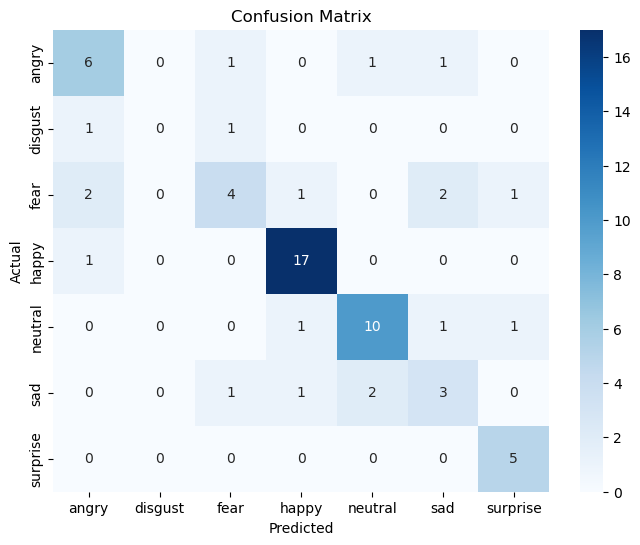

In [21]:
# 4. Evaluation - Classification Report & Confusion Matrix
model = load_model('best_model.h5')
val_images, val_labels = next(validation_generator)
predictions = model.predict(val_images)
y_true = np.argmax(val_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)

class_names = list(train_generator.class_indices.keys())
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_names))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


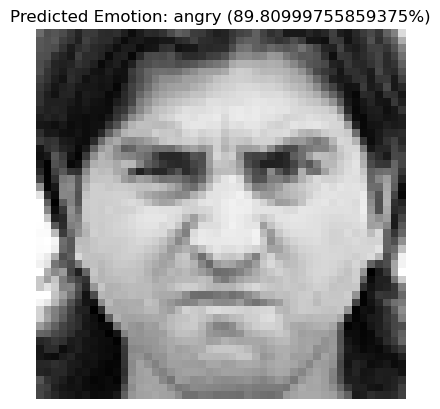

Emotion: angry, Confidence: 89.80999755859375%


In [27]:
# 5. Detection System
def detect_emotion(image_path):
    try:
        img = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_index = np.argmax(prediction)
        predicted_class = class_names[predicted_index]
        confidence = round(prediction[0][predicted_index] * 100, 2)

        plt.imshow(img, cmap='gray')
        plt.title(f'Predicted Emotion: {predicted_class} ({confidence}%)')
        plt.axis('off')
        plt.show()

        return predicted_class, confidence
    except FileNotFoundError:
        print("Please provide a valid image path for emotion detection.")
        return None, None

# Example Detection (replace with actual image paths)
predicted_emotion, confidence = detect_emotion(r"C:\Users\Desktop\Facial-Emotions-Detection\SampleDataset\anger.jpg")
if predicted_emotion and confidence:
    print(f"Emotion: {predicted_emotion}, Confidence: {confidence}%")


In [28]:
# 6. Save Model
model.save('facial_emotion_detection_model.h5')

In [29]:
# Print class names for reference
print("Class Names:", class_names)

Class Names: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
